# Explicitly calculation of Ising Partition Function

## Hamiltonian and more

Spin

$$
\sigma_i \in \{-1, 1\}
$$

Hamiltonian

$$
\mathcal{H} = -J \sum _{\left\langle i,j \right\rangle} \sigma_i \sigma_j -H \sum_{i} \sigma_i
$$

Partition function

$$
Z(\beta) = \sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} e^{-\beta \mathcal{H}}\\
= \sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} \exp\left(\beta J \sum _{\left\langle i,j \right\rangle} \sigma_i \sigma_j + \beta H \sum_{i} \sigma_i\right)
$$

Helmholtz free energy

$$
F(\beta) = -\frac{1}{\beta} \ln Z(\beta)
$$

Energy

$$
E(\beta) = \frac{\rm{d}}{\rm{d} \beta} (\beta F) = \frac{1}{Z(\beta)} \sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} \mathcal{H} e^{-\beta \mathcal{H}} \\
= \left\langle \mathcal{H} \right\rangle
$$

Specific heat

$$
C(\beta) = \frac{\rm{d} E}{\rm{d} T}(\beta) = \frac{1}{k_B T^2}\left(\frac{-1}{Z(\beta)^2} \left(\sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} \mathcal{H} e^{-\beta \mathcal{H}}\right)^2 + \frac{1}{Z(\beta)} \sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} \mathcal{H}^2 e^{-\beta \mathcal{H}}\right) \\
= \frac{1}{k_B T^2} \left(\left\langle \mathcal{H}^2 \right\rangle - \left\langle \mathcal{H} \right\rangle^2\right)
$$

Magnetization

$$
M(\beta) = -\frac{\rm{d} F}{\rm{d} H}(\beta) = \frac{1}{Z(\beta)} \sum_{\sigma_1=\pm 1} \cdots \sum_{\sigma_N=\pm 1} \sum_{i} \sigma_i e^{-\beta \mathcal{H}} = \sum_i \left\langle \sigma_i \right\rangle
$$

Magnetic susceptibility

$$
\chi(\beta) = -\frac{\rm{d}^2 F}{\rm{d} H^2}(\beta) = \beta\left(\sum_i \left\langle \sigma_i^2 \right\rangle - \sum_i \left\langle \sigma_i \right\rangle^2\right)
$$

## Plot

In [1]:
from math import fsum
import numpy as np
import matplotlib.pyplot as plt

class NumberOfState:
    def __init__(self, n: int):
        self.n = n
        self.spen_num = n * n
        data = []
        for line in open(f'data/{n}x{n}.txt'):
            e, m, c = line.split()
            data.append((int(e), int(m), int(c)))
        data = np.array(data)
        self.e, self.m, c = data.T
        self.c = np.log(c)

    def free_enegy(self, beta: float, h: float = 0.0) -> float:
        exponent = (self.e + self.m * h) * (-beta) + self.c
        max_e = np.amax(exponent)
        log_z = np.log(fsum(np.exp(exponent - max_e))) + max_e
        return -log_z / beta / self.spen_num

    def energy(self, beta: float, h: float = 0.0) -> float:
        exponent = (self.e + self.m * h) * (-beta) + self.c
        max_e = np.amax(exponent)
        e = fsum(self.e * np.exp(exponent - max_e))
        z = fsum(np.exp(exponent - max_e))
        return e / z / self.spen_num

    def magnetization(self, beta: float, h: float = 0.0) -> float:
        exponent = (self.e + self.m * h) * (-beta) + self.c
        max_e = np.amax(exponent)
        m = fsum(np.abs(self.m) * np.exp(exponent - max_e))
        z = fsum(np.exp(exponent - max_e))
        return m / z / self.spen_num

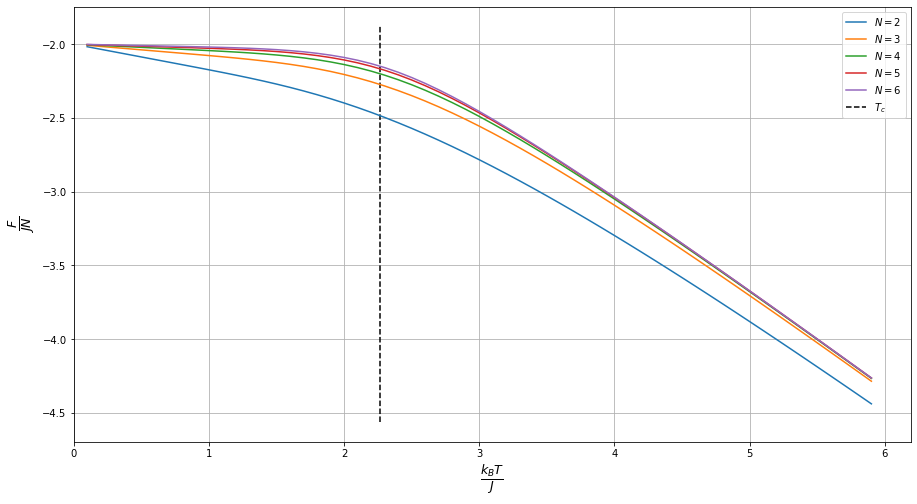

In [2]:
fig, ax = plt.subplots(figsize=(15, 8))

templature = np.arange(0.1, 6, 0.1)

ymin = float('inf')
ymax = float('-inf')
for n in [2, 3, 4, 5, 6]:
    ns = NumberOfState(n)
    free_enegy = [ns.free_enegy(1.0 / t) for t in templature]
    ax.plot(templature, free_enegy, label=f'$N={n}$')
    ymin = min(ymin, np.amin(free_enegy))
    y = min(ymin, np.amin(free_enegy))

ax.vlines(2 / np.log(1 + np.sqrt(2)), *ax.get_ybound(),  colors='black', linestyle='dashed', label='$T_c$')
ax.set_xlabel(r'$\frac{k_BT}{J}$', fontdict={'size': 18})
ax.set_ylabel(r'$\frac{F}{JN}$', fontdict={'size': 18})
ax.legend()
ax.set_xbound(0, None)
ax.grid()

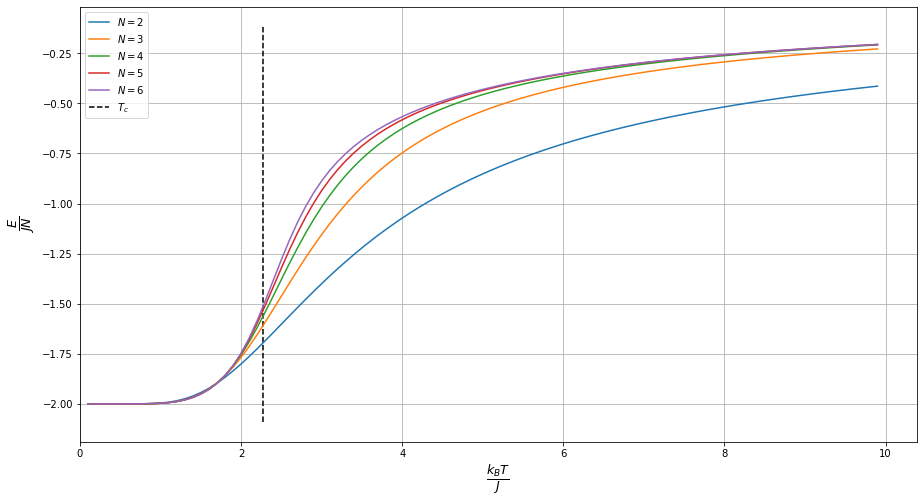

In [3]:
fig, ax = plt.subplots(figsize=(15, 8))

templature = np.arange(0.1, 10, 0.1)

for n in [2, 3, 4, 5, 6]:
    ns = NumberOfState(n)
    energy = [ns.energy(1.0 / t) for t in templature]
    ax.plot(templature, energy, label=f'$N={n}$')

ax.vlines(2 / np.log(1 + np.sqrt(2)), *ax.get_ybound(),  colors='black', linestyle='dashed', label='$T_c$')
ax.set_xlabel(r'$\frac{k_BT}{J}$', fontdict={'size': 18})
ax.set_ylabel(r'$\frac{E}{JN}$', fontdict={'size': 18})
ax.legend()
ax.set_xbound(0, None)
ax.grid()

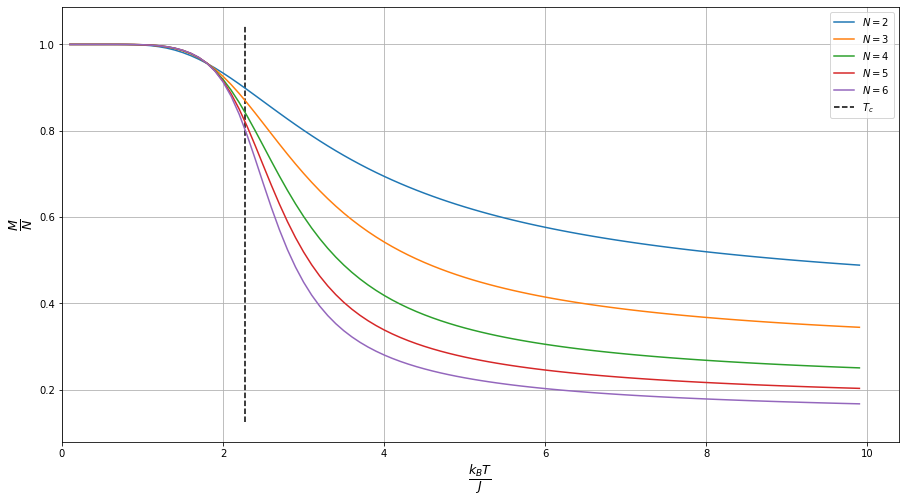

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))

templature = np.arange(0.1, 10, 0.1)

for n in [2, 3, 4, 5, 6]:
    ns = NumberOfState(n)
    magnetization = [ns.magnetization(1.0 / t) for t in templature]
    ax.plot(templature, magnetization, label=f'$N={n}$')

ax.vlines(2 / np.log(1 + np.sqrt(2)), *ax.get_ybound(),  colors='black', linestyle='dashed', label='$T_c$')
ax.set_xlabel(r'$\frac{k_BT}{J}$', fontdict={'size': 18})
ax.set_ylabel(r'$\frac{M}{N}$', fontdict={'size': 18})
ax.legend()
ax.set_xbound(0, None)
ax.grid()